## Develop a decision tree model to analyze the voltage and current patterns across the three phases of the transmission lines to detect faults


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [43]:
binary_data = pd.read_csv('detect_dataset.csv')

In [44]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [45]:
binary_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [46]:
#Columns 7 and 8 contain no information, so we drop them
binary_data.drop(binary_data.iloc[:,[7,8]], axis=1, inplace=True)

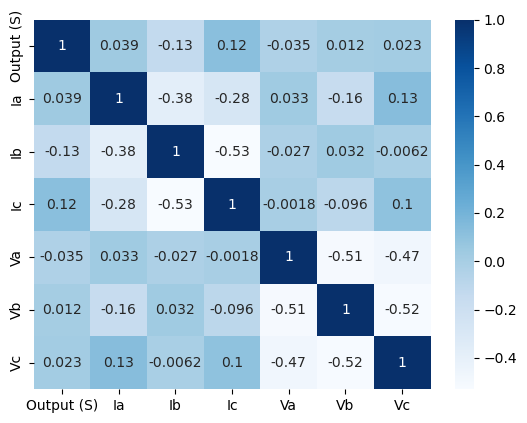

In [47]:
sns.heatmap(binary_data.corr(), annot=True, cmap='Blues')
plt.show()

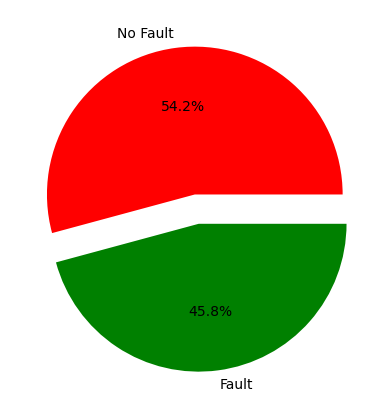

In [76]:
plt.pie(x=binary_data['Output (S)'].value_counts(), labels=['No Fault', 'Fault'],
        explode = [0, 0.2],autopct= '%1.1f%%', colors=['r', 'g'])
plt.show()

### Model Building - Binary Classifier

In [48]:
y = binary_data.iloc[:,0]
X = binary_data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 6), (2401, 6), (9600,), (2401,))

In [49]:
### import libraries 
#### decision tree - to solve classification problems and categorize objects depending on their learning features.       

from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model.predict(X_test)

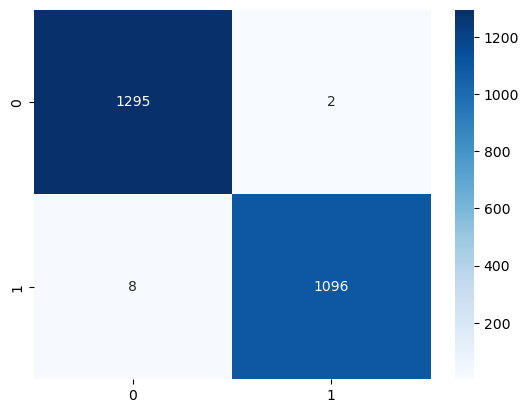

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [53]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 99.584%
Precision Score: 99.818%
Recall Score: 99.275%


In [70]:
### check fit of the model

new_data = {
    'Ia': [-120],
    'Ib': [90],
    'Ic':[30],
    'Va':[-0.9],
    'Vb':[0.5],
    'Vc':[0.4]
}

# Convert new data to DataFrame
new_df = pd.DataFrame(new_data)

In [71]:
y = model.predict(new_df)

In [72]:
# Display the predicted budget class
print("Fault occured:(0-No , 1:Y): ", y[0])

Fault occured:(0-No , 1:Y):  0


In [73]:
### check fit of the model
### check fit of the model
##286.5347198,61.598669,-46.89645534,-0.376998625,0.473361332,-0.096362707,,
new_data = {
    'Ia': [286.5347198],
    'Ib': [61.598669],
    'Ic':[-46.89645534],
    'Va':[-0.376998625],
    'Vb':[0.473361332],
    'Vc':[-0.096362707]
}

# Convert new data to DataFrame
new_df = pd.DataFrame(new_data)

In [68]:
y = model.predict(new_df)

In [69]:
# Display the predicted budget class
print("Fault occured:(0-No , 1:Y): ", y[0])

Fault occured:(0-No , 1:Y):  1
